# Import data

In [1]:
import os
# from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

def read_train():
    return pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")

def read_test():
    return pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

def read_submission():
    return pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")


# Exploratory Data Analysis

In [2]:
train = read_train()
test = read_test()
submission = read_submission()

まずは、どんなデータが入っているのか軽く確認しておきます。

In [3]:
print(f"shape = {train.shape}\n")
display(train.head())
display(train.info())

shape = (165034, 14)



,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


None

In [4]:
print(f"test.shape = {test.shape}\n")
display(test.head())
display(test.info())

test.shape = (110023, 13)



,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


None

In [5]:
print(f"submission.shape = {submission.shape}")
display(submission.head())

submission.shape = (110023, 2)


,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


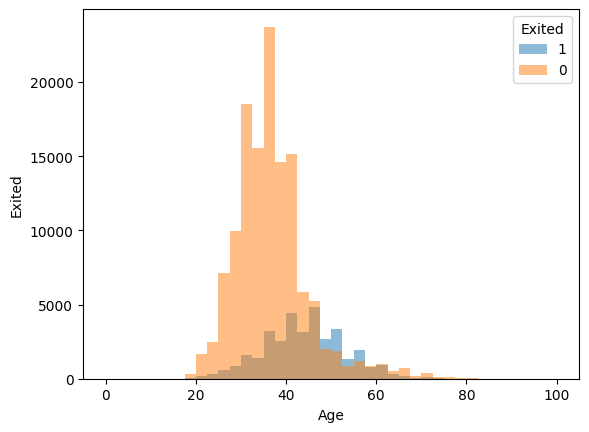

In [6]:
plt.hist(train.loc[train["Exited"] == 1, "Age"], bins=40, range=(0, 100), alpha=0.5, label="1")
plt.hist(train.loc[train["Exited"] != 1, "Age"], bins=40, range=(0, 100), alpha=0.5, label="0")
plt.xlabel("Age")
plt.ylabel("Exited")
plt.legend(title="Exited")

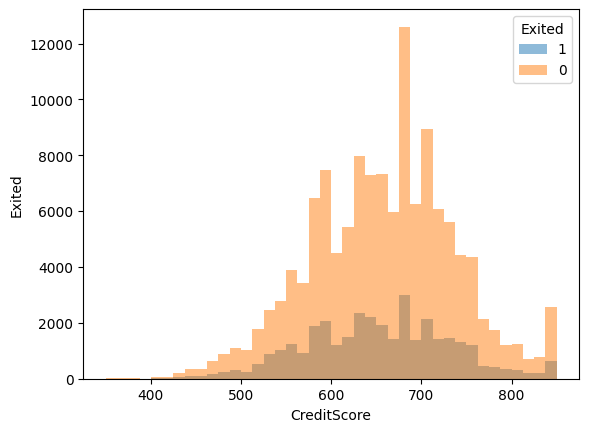

In [7]:
plt.hist(train.loc[train["Exited"] == 1, "CreditScore"], bins=40, alpha=0.5, label="1")
plt.hist(train.loc[train["Exited"] != 1, "CreditScore"], bins=40, alpha=0.5, label="0")
plt.xlabel("CreditScore")
plt.ylabel("Exited")
plt.legend(title="Exited")

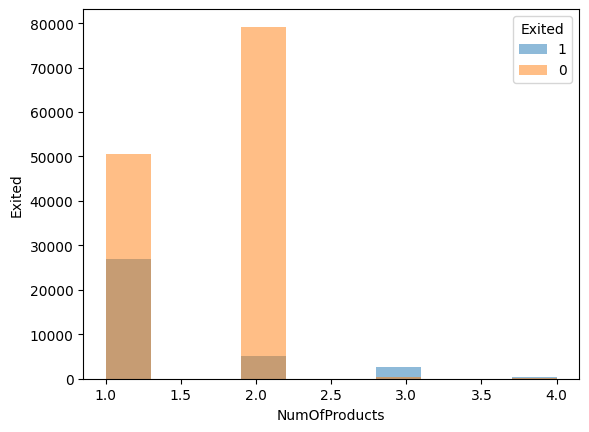

In [8]:
plt.hist(train.loc[train["Exited"] == 1, "NumOfProducts"], alpha=0.5, label="1")
plt.hist(train.loc[train["Exited"] != 1, "NumOfProducts"], alpha=0.5, label="0")
plt.xlabel("NumOfProducts")
plt.ylabel("Exited")
plt.legend(title="Exited")

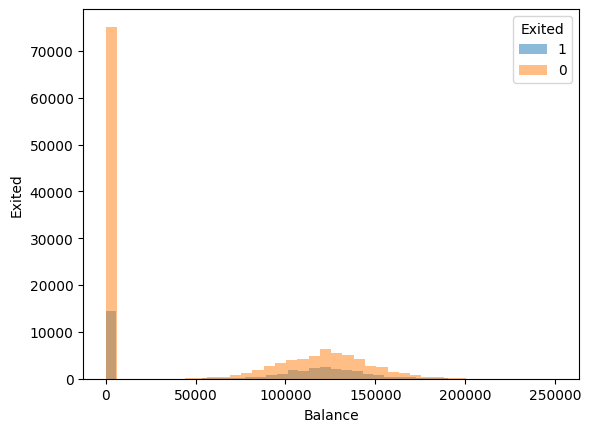

In [9]:
plt.hist(train.loc[train["Exited"] == 1, "Balance"], bins=40, alpha=0.5, label="1")
plt.hist(train.loc[train["Exited"] != 1, "Balance"], bins=40, alpha=0.5, label="0")
plt.xlabel("Balance")
plt.ylabel("Exited")
plt.legend(title="Exited")

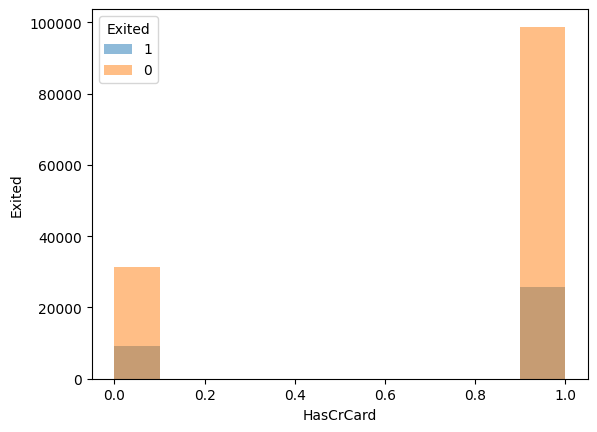

In [10]:
plt.hist(train.loc[train["Exited"] == 1, "HasCrCard"], alpha=0.5, label="1")
plt.hist(train.loc[train["Exited"] != 1, "HasCrCard"], alpha=0.5, label="0")
plt.xlabel("HasCrCard")
plt.ylabel("Exited")
plt.legend(title="Exited")

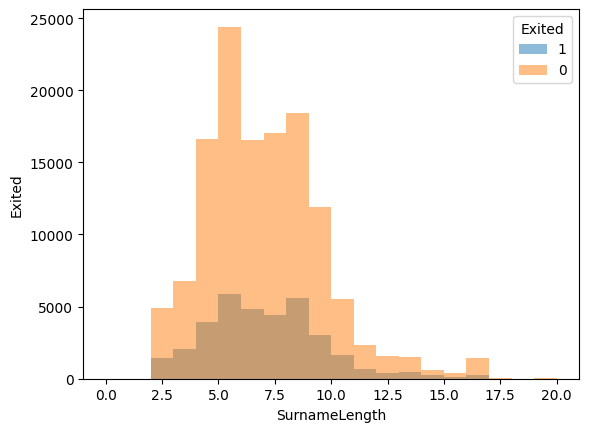

In [11]:
train["SurnameLength"] = train.apply(lambda r: len(r["Surname"]), axis=1)
plt.hist(train.loc[train["Exited"] == 1, "SurnameLength"], bins=20, range=(0, 20), alpha=0.5, label="1")
plt.hist(train.loc[train["Exited"] != 1, "SurnameLength"], bins=20, range=(0, 20), alpha=0.5, label="0")
plt.xlabel("SurnameLength")
plt.ylabel("Exited")
plt.legend(title="Exited")

Text(0, 0.5, 'Balance')

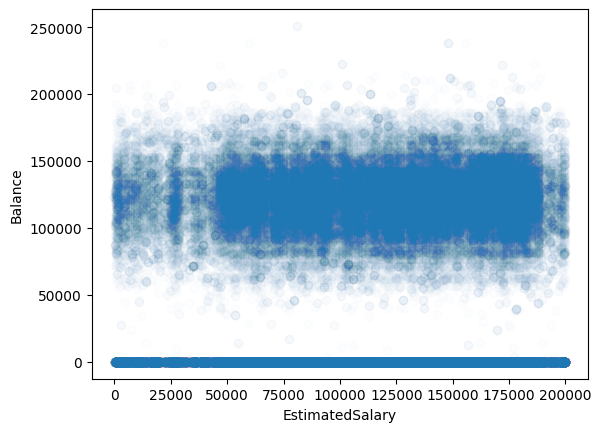

In [12]:
plt.scatter(train["EstimatedSalary"], train["Balance"], alpha=0.01)
plt.xlabel("EstimatedSalary")
plt.ylabel("Balance")

Text(0, 0.5, 'CreditScore')

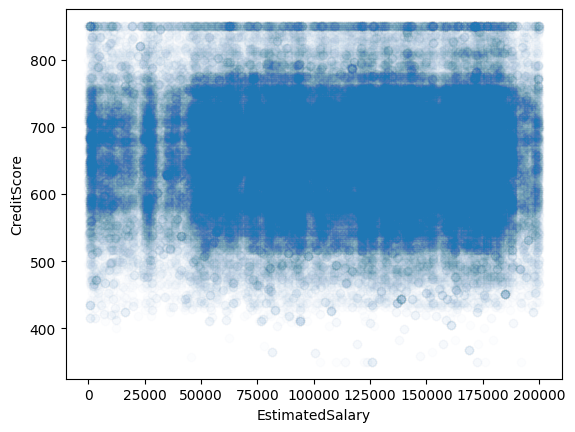

In [13]:
plt.scatter(train["EstimatedSalary"], train["CreditScore"], alpha=0.01)
plt.xlabel("EstimatedSalary")
plt.ylabel("CreditScore")

ID 情報以外のカラムを見て、重複レコードの存在を確認します。重複しているレコードは、Balance や EstimatedSalary まで完全に一致しているので、何らかのミスで重複したデータを登録してしまったものだと思われます。

In [14]:
temp = train.drop(columns = ["id", "CustomerId"])
temp = temp[temp.duplicated(keep=False)].sort_values(by="Surname")
temp

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SurnameLength
115924,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0,14
60181,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0,14
119071,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0,5
48622,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0,5
161457,Brennan,765,France,Female,50.0,9,126547.80,1,1.0,1.0,79579.94,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144132,Wright,632,France,Male,50.0,2,0.00,2,1.0,0.0,57942.88,0,6
21512,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0,7
20378,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0,7
30063,Young,606,Germany,Male,27.0,2,130274.26,2,1.0,1.0,147533.09,0,5


Balance（残高）の分布を見ると、0 のデータは特別扱いした方がよさそうです。 NoBalance というカラムを作成することにします。

# データ加工、学習、予測

### 1. データ加工

In [15]:
train = read_train()
train = train.drop(columns=["id", "CustomerId"])
train = train.drop_duplicates()  # 重複データの削除
train = pd.get_dummies(train, columns=["Geography", "Gender", "NumOfProducts"])
X = train.drop(columns=["Surname", "Exited"])
X["NoBalance"] = X["Balance"] == 0
y = train["Exited"]
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=7777
)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_valid: {X_valid.shape}")
print(f"Shape of y_valid: {y_valid.shape}")
print(f"Columns: {X.columns.values}")

Shape of X: (164980, 17)
Shape of y: (164980,)
Shape of X_train: (140233, 17)
Shape of y_train: (140233,)
Shape of X_valid: (24747, 17)
Shape of y_valid: (24747,)
Columns: ['CreditScore' 'Age' 'Tenure' 'Balance' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Geography_France' 'Geography_Germany'
 'Geography_Spain' 'Gender_Female' 'Gender_Male' 'NumOfProducts_1'
 'NumOfProducts_2' 'NumOfProducts_3' 'NumOfProducts_4' 'NoBalance']


### 2. 学習

In [16]:
# LightGBM のデータセット（訓練用＆評価用）を作成。
# データセットというのは、特徴量 (data) と正解ラベル (label) をセットにしたもの。
train_data = lgb.Dataset(data=X_train, label=y_train)
valid_data = lgb.Dataset(data=X_valid, label=y_valid, reference=train_data)

# LightGBM モデルの学習
clf = lgb.train(
    params={
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'binary_logloss',
    }, 
    train_set=train_data,
    valid_sets=[valid_data],
    num_boost_round=10000, # 最大の学習回数
    callbacks=[
        lgb.early_stopping(10),  # 連続10回改善しなかったら打ち切り
        lgb.log_evaluation(period=10),  # 学習ログを何回おきに出力するか
    ]
)

# 評価
y_pred = clf.predict(X_valid)
print(f"\nAUC Score = {roc_auc_score(y_valid, y_pred)}")

# 全データで学習
clf = clf.refit(X, y)
y_pred = clf.predict(X)
print(f"\nAUC Score = {roc_auc_score(y, y_pred)}")


[LightGBM] [Info] Number of positive: 29681, number of negative: 110552
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 140233, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211655 -> initscore=-1.314979
[LightGBM] [Info] Start training from score -1.314979
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.364993
[20]	valid_0's binary_logloss: 0.33683
[30]	valid_0's binary_logloss: 0.329304
[40]	valid_0's binary_logloss: 0.327132
[50]	valid_0's binary_logloss: 0.326129
[60]	valid_0's binary_logloss: 0.325424
[70]	valid_0's binary_logloss: 0.325196
[80]	valid_0's binary_logloss: 0.32508
[90]	valid_0's binary_logloss: 0.324965
[100]	valid_0's binary_logloss: 0.324929
Early stopping, best iteration is:
[99]	va

/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 34919, number of negative: 130061
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 164980, number of used features: 17

AUC Score = 0.8960543491573


### 予測、提出データ作成

In [17]:
# 予測
X_test = read_test()
X_test = X_test.drop(columns=["id", "CustomerId", "Surname"])
X_test = pd.get_dummies(X_test, columns=["Geography", "Gender", "NumOfProducts"])
X_test["NoBalance"] = X_test["Balance"] == 0
y_pred = clf.predict(X_test)
print(y_pred)

# 提出用 CSV
submission = read_submission()
submission['Exited'] = y_pred
submission.to_csv('submission.csv', index=False)


[0.02040825 0.83646818 0.02286047 ... 0.01757217 0.14568814 0.16984871]
